In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
di = np.random.uniform(0,5, 20)

In [99]:
# dp = np.random.exponential(5, size=(10))

In [100]:
def signal_model(x, a, b):
    return a*np.exp(b*x)

In [101]:
def c0_k(mu, x, k):
    return (((((k*x)-mu)**k)*np.exp(-k*x))/(np.math.factorial(k)))*(1+(k/(mu-(k*x))))

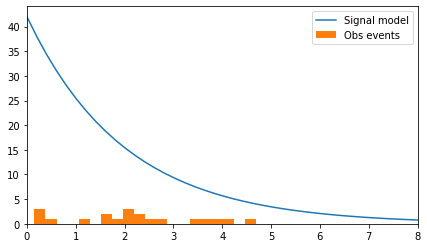

In [102]:
c1, c2 = 42, -0.5
plt.figure(figsize=(7,4))
x = np.linspace(0, 20, 100)
plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
value, bins, _ = plt.hist(di, bins = 20, label = 'Obs events')
# plt.hist(dp, bins = 20, label = 'Obs events')
binscenter=(bins[:-1]+bins[1:])*0.5
plt.xlim(0,8); plt.legend()
plt.show()

In [103]:
i, maxgaps = 0, []
for b in range(20):
    if i < 20 and value[i] ==0:
        for n in range(5):
            if value[i+n] !=0: 
                gaparea = np.trapz([signal_model(bins[i], c1, c2 ), signal_model(bins[i+n], c1, c2 )], [bins[i], bins[i+n]])
                maxgaps.append((i, i+n , gaparea))
                i+=n; 
                break
    else:
        i+=1
maxgaps.append((bins[-1], 8, np.trapz([signal_model(bins[-1], c1, c2 ), signal_model(8, c1, c2 )], [bins[-1], 8])))
maxarray = np.asarray(maxgaps)
maxvalues = maxarray[:][np.argmax(maxarray[:,2])]
print('maximum area ', maxvalues[2], 'is between', bins[int(maxvalues[0])], 'and', bins[int(maxvalues[1])])

maximum area  12.649812802999495 is between 0.606360294250188 and 1.0603015794155888


In [104]:
mu = 0
for b in range(20):
    mu+=np.trapz([signal_model(bins[b], c1, c2 ), signal_model(bins[b+1],c1, c2 )], [bins[b], bins[b+1]])
print('mu is', mu)
print('m is ', mu/maxvalues[2])
c0 = 0
for k in range(0, int(mu/maxvalues[2])+1):
    c0 +=c0_k(mu=mu, x = maxvalues[2], k=k)
print('C0', c0)

mu is 69.86734675250392
m is  5.52319214841955
C0 0.9998132394808381


### Finding optimum signal model / sigma and $C_0$

For constant c1 31.0  c2  -0.5
C0 is 0.8993424665226418
expected events / area under blue curve:  56.13936912721195


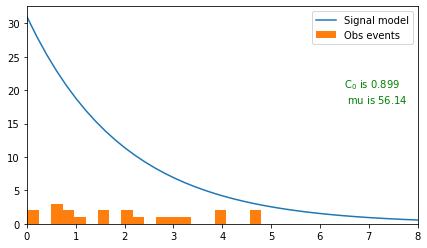

-------------------------------------
For constant c1 38.0  c2  -1.510204081632653
C0 is 0.8991617363545789
expected events / area under blue curve:  25.035528689850533


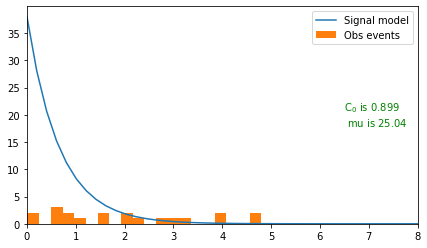

-------------------------------------
For constant c1 39.0  c2  -1.6020408163265305
C0 is 0.8997171387221063
expected events / area under blue curve:  24.23791465110961


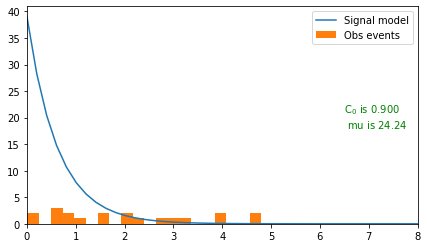

-------------------------------------
For constant c1 40.0  c2  -1.693877551020408
C0 is 0.8997098644600581
expected events / area under blue curve:  23.527256122044633


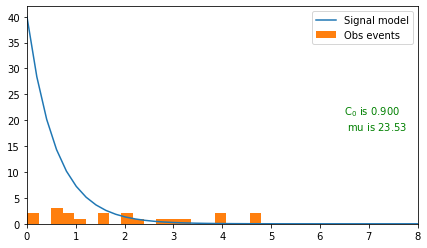

-------------------------------------
For constant c1 41.0  c2  -1.7857142857142856
C0 is 0.8991896913618127
expected events / area under blue curve:  22.890846204416963


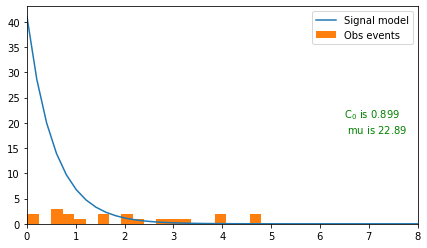

-------------------------------------
For constant c1 50.0  c2  -2.4285714285714284
C0 is 0.9007249493949789
expected events / area under blue curve:  20.6561786220809


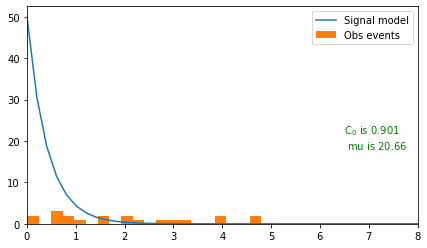

-------------------------------------


In [22]:
for c1 in np.linspace(1,50,50):
    for c2 in np.linspace(-5,-0.5,50):
        i, maxgaps = 0, []
        for b in range(20):
            if i < 20 and value[i] ==0:
                for n in range(5):
                    if value[i+n] !=0: 
                        gaparea = np.trapz([signal_model(bins[i], c1, c2 ), signal_model(bins[i+n], c1, c2 )], [bins[i], bins[i+n]])
                        maxgaps.append((i, i+n , gaparea))
                        i+=n; 
                        break
            else:
                i+=1
        maxgaps.append((bins[-1], 8, np.trapz([signal_model(bins[-1], c1, c2 ), signal_model(8, c1, c2 )], [bins[-1], 8])))
        maxarray = np.asarray(maxgaps)
        maxvalues = maxarray[:][np.argmax(maxarray[:,2])]

        mu = 0
        for b in range(20):
            mu+=np.trapz([signal_model(bins[b], c1, c2 ), signal_model(bins[b+1],c1, c2 )], [bins[b], bins[b+1]])

        c0 = 0
        for k in range(0, int(mu/maxvalues[2])+1):
            c0 +=c0_k(mu=mu, x = maxvalues[2], k=k)
        
        if c0 > 0.899 and c0 < 0.901:
            print('For constant c1', c1, ' c2 ', c2)
            print('C0 is', c0)
            print('expected events / area under blue curve: ', mu)
            plt.figure(figsize=(7,4))
            x = np.linspace(0, 20, 100)
            plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
            plt.hist(di, bins = 20, label = 'Obs events')
            plt.text(6.5,18,'$\mathregular{C_0}$ is %.3f \n $\mathregular{mu}$ is %.2f'%(c0, mu), color ='green')
            plt.xlim(0,8); plt.legend()
            plt.show()
            print('-------------------------------------')

## Optimum Interval method

[3. 1. 0. 0. 1. 0. 2. 1. 3. 2. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.] [0.15241901 0.37938965 0.60636029 0.83333094 1.06030158 1.28727222
 1.51424286 1.74121351 1.96818415 2.19515479 2.42212543 2.64909608
 2.87606672 3.10303736 3.33000801 3.55697865 3.78394929 4.01091993
 4.23789058 4.46486122 4.69183186]


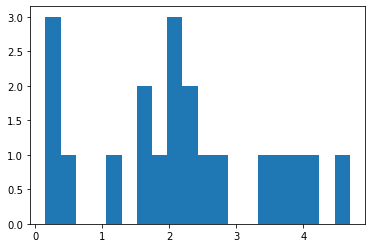

In [105]:
histvalue, xbins, _ = plt.hist(di, bins = 20, label = 'Obs events')
print(histvalue, xbins)

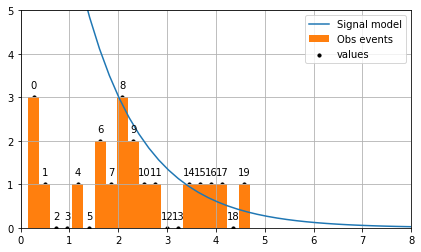

#events = 1 at bin#:  1 , xvalue[bin]:  0.37938965166748756 , histvalue[i]:  1.0
x =  5.956559018219767
#events = 1 at bin#:  4 , xvalue[bin]:  1.0603015794155888 , histvalue[i]:  1.0
x =  6.21961751568864
#events = 1 at bin#:  7 , xvalue[bin]:  1.7412135071636903 , histvalue[i]:  1.0
x =  0.7752824575199432
#events = 1 at bin#:  10 , xvalue[bin]:  2.4221254349117918 , histvalue[i]:  1.0
x =  0.449662761117906
#events = 1 at bin#:  11 , xvalue[bin]:  2.6490960774944923 , histvalue[i]:  1.0
x =  0.9692117446340014
#events = 1 at bin#:  14 , xvalue[bin]:  3.3300080052425933 , histvalue[i]:  1.0
x =  0.8082784315517331
#events = 1 at bin#:  15 , xvalue[bin]:  3.556978647825294 , histvalue[i]:  1.0
x =  0.1813838151364028
#events = 1 at bin#:  16 , xvalue[bin]:  3.7839492904079943 , histvalue[i]:  1.0
x =  0.15126583681947034
#events = 1 at bin#:  17 , xvalue[bin]:  4.010919932990695 , histvalue[i]:  1.0
x =  0.23324766314791343
#events = 1 at bin#:  19 , xvalue[bin]:  4.464861218156096 , 

In [113]:
c1, c2 = 15, -0.8
plt.figure(figsize=(7,4))
plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
plt.hist(di, bins = 20, label = 'Obs events')
plt.scatter(binscenter,value, s=10, color ='black',label ='values')
plt.xlim(0,8); plt.ylim(0,5);plt.legend();plt.grid()
for i in range(20):
    plt.text(xbins[i]+0.12 , histvalue[i] + 0.2, str(i), fontsize=10, ha='center')
plt.show()

n = 1

i, maxgaps = 0, []
for b in range(20):
    if b < len(histvalue) and histvalue[b] ==n:
        print('#events = '+ str(n)+' at bin#: ', b, ', xvalue[bin]: ',xbins[b], ', histvalue[i]: ',histvalue[b])
        if  b !=0:
            for m in np.arange(1,10):
                if histvalue[b-m] ==0:
                    continue
                else: 
                    startbin = b-m+1
                    startx = xbins[startbin]
#                     print('startbin ', startbin, ', xvalue of start bin ', startx)
                    break
        else: 
            startbin = b
#             print('b = 0 - startbin ', startbin, ', xvalue of start bin ', startx)
            start = xbins[b]
            
        for m in np.arange(1,10):
            if b+m < len(histvalue) and histvalue[b+m] ==0:
                continue
            else: 
                endbin = b+m
                endx = xbins[endbin]
#                 print('endbin ', endbin, ', xvalue of end bin ', endx)
                break            
        
        gaparea = np.trapz([signal_model(startx, c1, c2 ), signal_model(endx, c1, c2 )], [startx, endx])
        print('x = ', gaparea)
        maxgaps.append((startx, endx , gaparea))

In [109]:
maxarray = np.asarray(maxgaps)
print(maxarray)
maxvalues = maxarray[:][np.argmax(maxarray[:,2])]

[[0.37938965 1.06030158 5.95655902]
 [0.60636029 1.51424286 6.21961752]
 [1.74121351 1.96818415 0.77528246]
 [2.42212543 2.64909608 0.44966276]
 [2.64909608 3.33000801 0.96921174]
 [2.87606672 3.55697865 0.80827843]
 [3.55697865 3.78394929 0.18138382]
 [3.78394929 4.01091993 0.15126584]
 [4.01091993 4.46486122 0.23324766]
 [4.23789058 4.69183186 0.19451792]]


In [110]:
maxvalues

array([0.60636029, 1.51424286, 6.21961752])

In [111]:
mu = 0
for b in range(20):
    mu+=np.trapz([signal_model(xbins[b], c1, c2 ), signal_model(xbins[b+1],c1, c2 )], [xbins[b], xbins[b+1]])
print('mu is', mu)
print('m is ', mu/maxvalues[2])

mu is 16.202545284481992
m is  2.6050710101725665


In [112]:
c0 = 0
for k in range(0, int(mu/maxvalues[2])+1):
    c0 +=c0_k(mu=mu, x = maxvalues[2], k=k)
print(c0)

0.9781868512690647
